<a href="https://colab.research.google.com/github/Juliogallinaro/Busca-A-para-labirintos/blob/main/Busca_A_para_resolu%C3%A7%C3%A3o_de_labirintos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busca A* para resolução de labirintos 



## Método para gerar e desenhar labirintos aleatórios. 

In [45]:
from random import shuffle, randrange

def cria_labirinto(larg = 8, alt = 3):
  vis = [[0] * larg+ [1] for _ in range(alt)] + [[1] * (larg +1)]
  sem_muros = []

  def quebra_muros(lin, col):
    vis[lin][col] = 1
    d = [(lin, col + 1),(lin,col - 1),(lin - 1, col), (lin + 1, col)]
    shuffle(d)

    for (l, c) in d:
      if vis[l][c] != 1:
        sem_muros.append((lin, col, l, c))
        quebra_muros(l, c)

  quebra_muros(randrange(alt), randrange(larg))
  return(sem_muros)
    
def desenha_labirinto(lab, larg = 8, alt = 3):
  ver = [['|  '] * larg + ['|'] for _ in range(alt)] + [[]]
  hor = [['+--'] * larg + ['+'] for _ in range(alt + 1)]
  
  for (l1, c1, l2, c2) in lab:
    if l1 == l2:
      ver[l1][max(c1, c2)] = '   '
    if c1 == c2:
      hor[max(l1, l2)][c1] = '+  '

  for (a, b) in zip(hor, ver):
    print(''.join(a + ['\n'] + b))



Exemplo de labirinto com dimensão $8\times8$ células.

In [46]:
lab = cria_labirinto(8, 8)

In [47]:
desenha_labirinto(lab, 8, 8)

+--+--+--+--+--+--+--+--+
|           |           |
+  +--+--+  +  +--+--+  +
|  |     |  |     |     |
+  +  +  +  +  +--+  +  +
|  |  |  |  |  |     |  |
+--+  +--+  +  +  +--+  +
|     |        |  |     |
+  +--+  +--+--+  +--+  +
|  |           |     |  |
+  +--+--+--+--+--+  +--+
|        |        |     |
+--+--+  +  +--+  +--+  +
|     |  |  |     |     |
+  +--+  +  +  +--+  +  +
|           |        |  |
+--+--+--+--+--+--+--+--+



## Método para desenhar o caminho encontrado pelo algoritmo de busca.

In [4]:
def desenha_caminho( caminho, lab, larg = 8, alt = 3):
  ver = [['|  '] * larg + ['|'] for _ in range(alt)] + [[]]
  hor = [['+--'] * larg + ['+'] for _ in range(alt + 1)]
  for (l1, c1, l2, c2) in lab:
    if l1 == l2:
      ver[l1][max(c1, c2)] = '   '
    if c1 == c2:
      hor[max(l1, l2)][c1] = '+  '

  for [l1, c1] in caminho:
    #vertical
    if c1 == 0 : 
      if l1 == 0 :
        ver[l1][c1] = '|**'
      if l1 != 0:
            ver[l1][c1] = '|**'
    if c1 != 0 :
      if ver[l1][c1] == '   ':
        if l1 == 0 :
          ver[l1][c1] = '***'
        if l1 != 0:
              ver[l1][c1] = ' **'
      else:
         if l1 == 0 :
          ver[l1][c1] = '***'
         if l1 != 0:
          ver[l1][c1] = '|**'   

    #horizontal
  for p1, p2 in zip(caminho[:-1], caminho[1:]):
    if p1[1] == p2[1] and p1[0] == (p2[0]-1):
      hor[p2[0]][p2[1]] = '+**'
    if p1[1] == p2[1] and p1[0] == (p2[0]+1):
      hor[p1[0]][p1[1]] = '+**'

  for (a, b) in zip(hor, ver):
    print(''.join(a + ['\n'] + b))
    

Exemplo de caminho fornecido (lista de tuplas) e desenho realizado no labirinto.

In [5]:
caminho = [(0, 0),(0, 1),(0, 2),(1, 2),(2, 2), (2, 1),(1, 1)]
desenha_caminho(caminho, lab , 8, 8)

+--+--+--+--+--+--+--+--+
|********      |        |
+  +--+**+--+  +  +--+  +
|  |** **   |     |     |
+  +**+**+--+  +--+--+--+
|  |**|**      |        |
+  +--+--+  +--+--+--+  +
|  |     |        |     |
+  +  +  +--+--+--+  +--+
|     |           |  |  |
+  +--+--+--+--+  +  +  +
|     |     |  |     |  |
+--+  +  +  +  +--+--+  +
|     |  |        |     |
+  +--+  +--+--+  +--+  +
|        |              |
+--+--+--+--+--+--+--+--+



## Método para mapear as células do labirinto
Define para quais direções é possivel se movimentar a partir de cada célula. Esse metodo é necessario para a aplicação do algoritmo de resolução.

In [6]:
import pandas as pd
def criar_mapa(lab, larg = 8, alt = 8 ):
  coordenadas = [(l, c) for c in range(larg) for l in range(alt)]
  paredes_abertas_b = []
  paredes_abertas_c = []
  paredes_abertas_d = []
  paredes_abertas_e = []

  for (l1, c1, l2, c2) in lab:
    #Em baixo
    if l1 == (l2-1) and c1 == c2:
      paredes_abertas_b.append((l1, c1, 1))
    if l1 == (l2+1) and c1 == c2:
      paredes_abertas_b.append((l2, c2, 1))
    #Em cima
    if l1 == (l2+1) and c1 == c2:
      paredes_abertas_c.append((l1, c1, 1))
    if l1 == (l2-1) and c1 == c2:
      paredes_abertas_c.append((l2, c2, 1))
    #Direta
    if c1 == (c2-1) and l1 == l2:
      paredes_abertas_d.append((l1, c1, 1))
    if c1 == (c2+1) and l1 == l2:
      paredes_abertas_d.append((l2, c2, 1))
    #Esquerda
    if c1 == (c2+1) and l1 == l2:
      paredes_abertas_e.append((l1, c1, 1))
    if c1 == (c2-1) and l1 == l2:
      paredes_abertas_e.append((l2, c2, 1))
  baixo = pd.DataFrame(paredes_abertas_b, columns =['Linha', 'Coluna', 'Em baixo'])
  cima = pd.DataFrame(paredes_abertas_c, columns =['Linha', 'Coluna', 'Em cima'])
  direita = pd.DataFrame(paredes_abertas_d, columns =['Linha', 'Coluna', 'Direita'])
  esquerda = pd.DataFrame(paredes_abertas_e, columns =['Linha', 'Coluna', 'Esquerda'])

  mapa_paredes_bc = pd.merge(baixo, cima, how="outer", on=["Linha", "Coluna"])
  mapa_paredes_bcd = pd.merge(mapa_paredes_bc, direita, how="outer", on=["Linha", "Coluna"])
  mapa_paredes_bcde = pd.merge(mapa_paredes_bcd, esquerda, how="outer", on=["Linha", "Coluna"])
  #caso alguma celula não foi marcada
  if len(mapa_paredes_bcde) < larg*alt :
    coordenadas = [(l, c) for c in range(larg) for l in range(alt)]
    celulas_totais = []
    for [l, c] in coordenadas:
      celulas_totais.append((l, c))
    celulas_totais_df = pd.DataFrame(celulas_totais, columns =['Linha', 'Coluna'])
    mapa_paredes_bcde = pd.merge(mapa_paredes_bcde, celulas_totais_df, how="right", on=["Linha", "Coluna"])
  return mapa_paredes_bcde

Exemplo de mapa criado, utiliza a estrutura de dados pandas.dataframe.

In [7]:
mapa = criar_mapa(lab, 8, 8 )

In [9]:
mapa.head()

,Linha,Coluna,Em baixo,Em cima,Direita,Esquerda
0,2,7,1.0,NaN,NaN,1.0
1,3,6,1.0,NaN,1.0,NaN
2,4,6,1.0,1.0,NaN,NaN
3,4,5,1.0,NaN,NaN,1.0
4,3,2,1.0,NaN,NaN,1.0


## Método para a solução do labirinto utilizando o algoritmo de busca A*.

A algoritmo A* decide qual caminho seguir baseado no custo de cada uma das células do labirinto e o algoritmo seleciona o caminho com custo mínimo. O custo de uma célula $n$ tem duas partes e é definido como:

 $$f (n) = g (n) + h (n)$$

Onde $f (n)$ é o custo total para atingir a céula $n$ e $g(n)$ e $h(n)$ são definidos como:

$g(n)$ É o custo real para alcançar a célula $n$ a partir da célula inicial.

$h(n)$ É o custo heurístico para chegar à célula objetivo a partir da célula $n$. Seleção adequada da função heurística é um parâmetro-chave do algoritmo A*. Foi utilizada a distância de Manhattan como a função heurística:

$$d(\mathbf{x,y}) ={ \sum \limits _{i=1}^{n}}\mid {x}_{ i} - {y}_{i}\mid $$

É a inclusão do custo Heurístico no algoritmo A* que o torna eficiente em comparação ao BFS ou DFS, pois o algoritmo seleciona as células com custo mínimo (custo real + custo estimado) e, portanto, se aproxima do objetivo rapidamente.

[Referência](https://levelup.gitconnected.com/a-star-a-search-for-solving-a-maze-using-python-with-visualization-b0cae1c3ba92) 

In [14]:
from queue import PriorityQueue
def h(cell1,cell2):

    x1,y1=cell1
    x2,y2=cell2
    return abs(x1-x2) + abs(y1-y2)

def Resolver(lab, mapa, larg = 8, alt = 8, inicio = (0,0), final = (7,7)):

  inicioL,inicioC = inicio
  mapa["func_g"] = float('inf')
  mapa.at[mapa[(mapa['Linha'] == inicioL) & (mapa['Coluna']== inicioC)].index,'func_g'] = 0
  mapa["func_f"] = float('inf')
  mapa.at[mapa[(mapa['Linha'] == inicioL) & (mapa['Coluna']== inicioC)].index,'func_f'] = h(inicio,final)
  open=PriorityQueue()
  open.put((h(inicio,final),h(inicio,final),inicio))
  caminho={}
  while not open.empty():
    cel_atual=open.get()[2]
    if cel_atual==(final):
          break
    for d in ('Em baixo', 'Em cima', 'Direita', 'Esquerda'):
      if mapa.loc[(mapa['Linha'] == cel_atual[0]) & (mapa['Coluna']== cel_atual[1]), d].any() == True:

        if d=='Em baixo':
            cel_filha=(cel_atual[0]+1,cel_atual[1])
            #print("baixo", cel_atual )
        if d=='Em cima':
            cel_filha=(cel_atual[0]-1,cel_atual[1])
            #print("cima", cel_atual)
        if d=='Direita':
            cel_filha=(cel_atual[0],cel_atual[1]+1)
            #print("Direita",cel_atual )
        if d=='Esquerda':
            cel_filha=(cel_atual[0],cel_atual[1]-1)
            #print("Esquerda", cel_atual)

        temp_func_g = mapa.at[mapa[(mapa['Linha'] == 0) & 
                                    (mapa['Coluna']== 0)].index,'func_g'] = (
                                        mapa.loc[(mapa['Linha'] == 0) & (
                                            mapa['Coluna']== 0), ['func_g']]+1)
        temp_func_f=temp_func_g+h(cel_filha,final)
        if mapa.loc[(mapa['Linha'] == cel_filha[0]) & (mapa['Coluna']== cel_filha[1]), 'func_f'].any() == True:
          if temp_func_f.func_g.item() <  mapa.loc[(mapa['Linha'] == cel_filha[0]) & (mapa['Coluna']== cel_filha[1]), 'func_f'].item():
            mapa.at[mapa[(mapa['Linha'] == cel_filha[0]) & (mapa['Coluna']== cel_filha[1])].index,'func_g'] = temp_func_g
            mapa.at[mapa[(mapa['Linha'] == cel_filha[0]) & (mapa['Coluna']== cel_filha[1])].index,'func_f'] = temp_func_f
            open.put((temp_func_f.func_g.item(),h(cel_filha,final),cel_filha))
            caminho[cel_filha]=cel_atual
          


  caminho_dic={}
  cel=final
  while cel!=inicio:
        caminho_dic[caminho[cel]]=cel
        cel=caminho[cel]

  caminho_final = []
  caminho_final.append(final)
  for x in caminho_dic:
    caminho_final.append(x)

  return caminho_final

Solução para o labirinto apresentado com dimensão $8\times8$ células, inicio na célula $(0,0)$ e término na célula $(7,7)$.

In [15]:
 caminho = Resolver(lab, mapa, larg = 8, alt = 8, inicio = (0,0), final = (7,7))

In [16]:
caminho

[(7, 7),
 (7, 6),
 (7, 5),
 (6, 5),
 (6, 4),
 (6, 3),
 (5, 3),
 (5, 2),
 (6, 2),
 (7, 2),
 (7, 1),
 (7, 0),
 (6, 0),
 (6, 1),
 (5, 1),
 (5, 0),
 (4, 0),
 (3, 0),
 (2, 0),
 (1, 0),
 (0, 0)]

Desenho da solução no labrinto.

In [13]:
desenha_caminho(caminho, lab , 8, 8)

+--+--+--+--+--+--+--+--+
|**            |        |
+**+--+--+--+  +  +--+  +
|**|        |     |     |
+**+  +  +--+  +--+--+--+
|**|  |        |        |
+**+--+--+  +--+--+--+  +
|**|     |        |     |
+**+  +  +--+--+--+  +--+
|**   |           |  |  |
+**+--+--+--+--+  +  +  +
|** **|** **|  |     |  |
+--+**+**+**+  +--+--+  +
|** **|**|** ** **|     |
+**+--+**+--+--+**+--+  +
|** ** **|      ** ** **|
+--+--+--+--+--+--+--+--+



## Metodo para resolver o labirinto e desenhar a solução

In [17]:
def resolver_plotar(lab, larg = 8, alt = 8, inicio = (0,0), final = (0,0)):
  mapa = criar_mapa(lab, larg, alt)
  caminho = Resolver(lab, mapa, larg, alt, inicio, final)
  desenha_caminho(caminho, lab , larg, alt)

Exemplo de labirinto com dimensão $32\times32$ células, inicio na célula $(0,0)$ e término na célula $(31,31)$.

In [19]:
larg = 32
alt = 32
inicio = (0,0)
fim = (larg-1,alt-1)
lab = cria_labirinto(larg, alt)
resolver_plotar(lab, larg, alt, inicio, fim)

+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
|**         |                                |        |              |           |              |
+**+--+  +  +  +--+  +--+--+--+--+--+  +--+--+  +--+  +  +--+--+  +  +  +--+--+  +  +--+  +--+  +
|**|  |  |  |  |  |  |     |        |  |           |  |  |     |  |  |     |  |  |  |     |     |
+**+  +  +--+  +  +  +  +  +  +--+  +--+  +--+--+--+  +--+  +  +--+  +--+  +  +  +  +  +--+  +--+
|** **|  |     |  |  |  |     |  |     |        |     |     |     |        |  |     |  |  |     |
+--+**+  +  +--+  +  +  +--+--+  +--+  +--+--+  +  +--+  +--+--+  +  +--+--+  +--+--+  +  +--+  +
|** **|     |     |     |  |        |     |     |           |     |  |        |     |  |     |  |
+**+--+--+--+  +  +--+--+  +  +  +  +--+  +  +--+--+--+--+--+  +--+  +  +--+  +  +  +  +--+  +  +
|**|           |        |     |  |     |     |     |           |  |  |     |  |  |     |     |  |
+**+  +--+--+  +--+-

## Avaliação do tempo de execução do algortimo.

Um pequeno estudo sobre a performance do algoritmo com o aumento da complexidade dos labirintos.



## Método para avaliar o tempo de execução

São gerados 6 labirintos para cada dimensão que vão de $4 \times 4$ a $32 \times 32$ células, totalizando 174 labirintos para avaliar o algoritmo.

O experimento leva aproximadamente 11 minutos para ser realizado.

In [27]:
import time

rows = []


for i in range(4,33):
  for exec in range(6):
    lab = cria_labirinto(i, i)

    start_time = time.time()
    resolver_plotar(lab, i, i, (0,0), (i-1,i-1))
    tok = (time.time() - start_time)
    rows.append([i, exec, tok])

df = pd.DataFrame(rows, columns=["Tamanho", "Execução", "Tempo"])

   

A saída de streaming foi truncada nas últimas 5000 linhas.
+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+

+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
|********|     |           |                    |
+--+--+**+  +--+  +  +--+  +--+--+--+--+  +--+--+
|     |**|        |     |        |     |        |
+--+  +**+--+  +--+--+  +--+--+  +  +  +--+--+  +
|     |** **|  |        |  |     |  |        |  |
+  +--+--+**+--+  +--+--+  +  +--+  +--+--+  +  +
|** **|** **|     |     |  |  |        |  |     |
+**+**+**+--+  +--+  +  +  +  +  +--+  +  +--+  +
|**|** **|     |     |  |     |  |     |        |
+**+--+--+  +  +  +--+  +--+  +--+  +--+  +--+--+
|** **|     |  |  |  |     |        |  |        |
+--+**+--+--+  +  +  +--+  +--+--+--+  +--+--+  +
|  |** **|     |     |  |        |              |
+  +--+**+  +  +--+  +  +--+--+  +  +--+--+--+  +
|     |**|  |  |     |        |  |  |        |  |
+  +--+**+  +  +  +--+  +  +  +  +--+  +--+  +--+
|** ** **|  |  |  |  |  |  |  |        |

### Resultados:

10 primeiros resultados.

In [39]:
df.head(10)

,Tamanho,Execução,Tempo
0,4,0,0.218206
1,4,1,0.237844
2,4,2,0.210688
3,4,3,0.146295
4,4,4,0.201025
5,4,5,0.178946
6,5,0,0.397943
7,5,1,0.364929
8,5,2,0.304068
9,5,3,0.294006


Médias e desvio padrões para cada dimensão.

In [40]:
df1 = df.groupby( ["Tamanho"]).agg({'Tempo': ['mean', 'std']})
df1

Tempo          
              mean       std
Tamanho                     
4         0.198834  0.032244
5         0.322584  0.049372
6         0.437461  0.121874
7         0.515056  0.169662
8         0.722073  0.158481
9         0.790853  0.240102
10        1.094970  0.289259
11        1.295553  0.234944
12        1.371066  0.283488
13        1.578842  0.558328
14        1.587188  0.345224
15        2.798480  0.890619
16        1.942624  0.524759
17        2.933085  1.158740
18        3.386187  1.045531
19        2.847298  1.214717
20        3.300505  1.023752
21        3.929275  1.663780
22        4.880673  1.099832
23        4.434120  2.186719
24        3.972492  1.048703
25        6.830228  2.701865
26        4.978790  2.308568
27        6.519235  2.712479
28        9.438021  2.756258
29        7.981696  3.048154
30       12.260296  3.479728
31        9.555096  4.480149
32        9.330798  4.603030

Boxplot dos tempos de execução por dimensão.

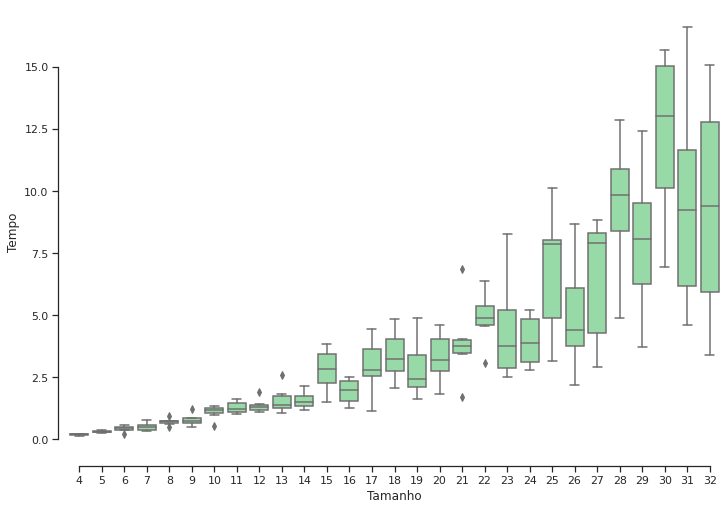

In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Tamanho", y="Tempo", palette=["g"],
            data=df)
sns.despine(offset=10, trim=True)